<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2
## Part 5: Production Model and Insights


In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel

### Production Model 

Based on the parametric experiments in Part 3 and the hyperparameter tuning results in Part 4, we can safely conclude that the LassoCV model with alpha at 920.37 is the model that performs the best and generalizes the best; hence this is the model adopted as the production model. 

In [2]:
# load the LassoCV model trained in Part 3.
%store -r reg

### Features Selected by the LassoCV Model

Now we look at the coefficients remaining nonzero after Lasso model shrinks all the non-informative ones to zeros.

In [3]:
%store -r X1

In [4]:
no_features=len(X1.columns[np.nonzero(reg.coef_)])
print(f'The number of informative features after LASSO selection is {no_features}.')

The number of informative features after LASSO selection is 96.


In [5]:
len(X1.columns[np.nonzero(reg.coef_)])

96

In [6]:
#reg.coef_[np.nonzero(reg.coef_)]

In [7]:
coef_df = pd.DataFrame(reg.coef_[np.nonzero(reg.coef_)]).T

In [8]:
coef_df.columns=X1.columns[np.nonzero(reg.coef_)]

In [9]:
coef_df2=coef_df.T

In [10]:
coef_df2.index.name='feature'

In [11]:
coef_df2.columns=['coefficient']

In [12]:
coef_df2.columns=coef_df2.columns.to_flat_index()

In [13]:
coef_ordered=coef_df2.sort_values(by=['coefficient'],ascending=True)

Text(0, 0.5, 'Feature')

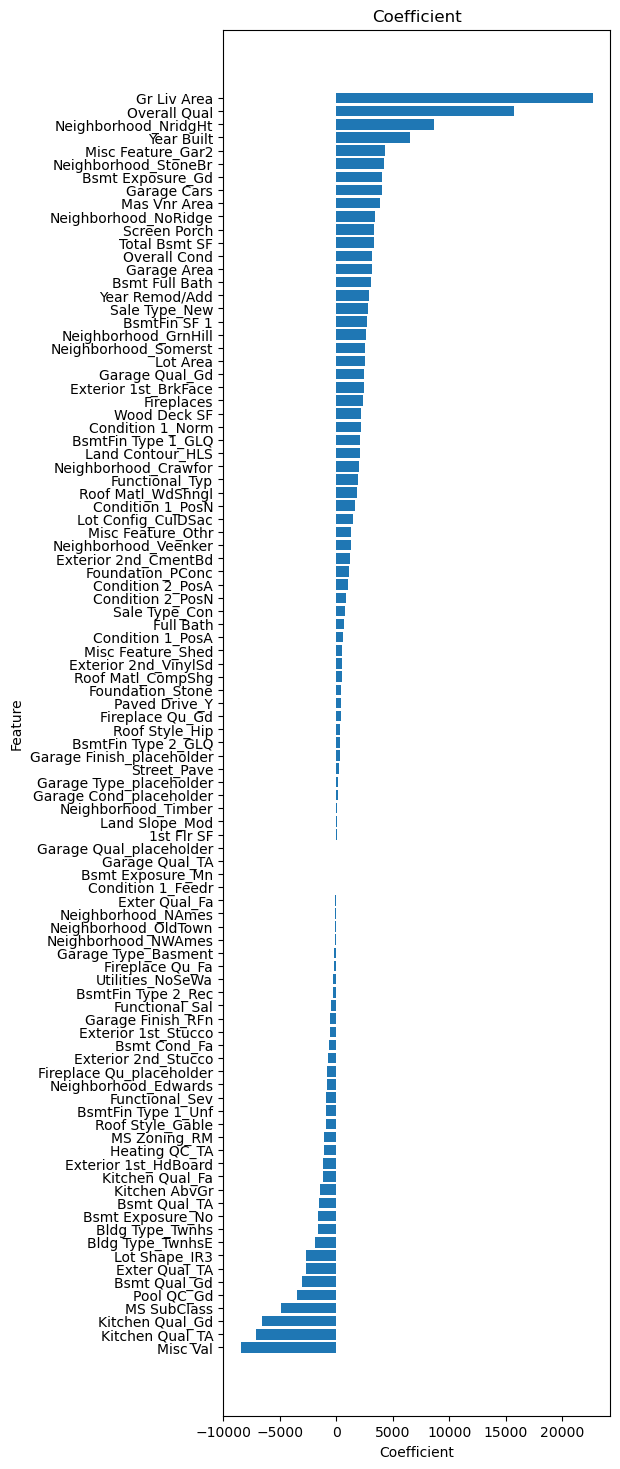

In [14]:
plt.figure(figsize=(5,18)) 
plt.barh(coef_ordered.index,coef_ordered['coefficient'])
plt.title('Coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

In [15]:
plt.savefig('../pictures/Coefficients.PNG')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature')

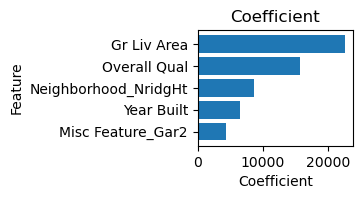

In [16]:
# Now we plot the most evident 10 features. They should be the 10 with the largest beta values. 
plt.figure(figsize=(2,1.5)) 
plt.barh(coef_ordered.index[-5:],coef_ordered['coefficient'][-5:])
plt.title('Coefficient')
plt.xlabel('Coefficient')
plt.ylabel('Feature')

In [17]:
plt.savefig('../pictures/Top 10 coefficients.PNG')

<Figure size 640x480 with 0 Axes>

### Reverse scale the coefficients

The highest values of coefficients from the trained model suggests that the top 5 factors that affect the saleprice of a house.
- above ground living area, 
- overall quality,
- neighborhood being Northridge Heights, 
- built year, and
- if there is a second garage.

To quantify exactly how much change of the sale price is bought by per unit change in the top three features, the coefficients of those three features need to be divided by their standand deviations, to reverse the scaling effect.


In [18]:
# Reverse scaling the coefficients
coef_ordered['true_coefficient']=[coef_ordered['coefficient'][i]/np.std(X1[coef_ordered.index[i]]) for i in range(96)]

In [19]:
# Top 5 features
coef_ordered.sort_values(by='coefficient',ascending=False).head()

,coefficient,true_coefficient
feature,,
Gr Liv Area,22703.742814,45.731816
Overall Qual,15702.848882,11132.708989
Neighborhood_NridgHt,8683.993559,38111.137254
Year Built,6566.810650,219.468160
Misc Feature_Gar2,4301.989293,100061.890149


### Interpretations on the top 5 factors: 
With all the other factors hold constant, 
* Per square feet increase in above ground living area will lead to an increase of $45.73 in price on average; 

* Every level upgrade in the overall quality scale will lead to an increase of $11,133 in prices on average;

* Prices of houses in the neighborhood of Northridge Heights are $38,111 higher than that of houses in the neighborhood of Bloomington Heights;

* Each year more recently built contribute to a $219 raise in the price on averge;

* Houses with a second garage are $100,062 more expensive than houses with an elevator on average (probably because they are highrise apartments that are smaller than houses with 2 garages). 


    

Stakeholders in real estate investments should take these into consideration in order to maximize return, such as picking more recently built and better furnished houses/apartments. Also, since the results suggest that neighborhoods are among the top factors affecting the salesprice of a house, from the bar plots of mean values of salesprice of each neighborhood below, Stone Bridge, NorthRidge Heights and Northridge are the most valuable neighborhoods.

<AxesSubplot:title={'center':'SalePrice by Neighborhood'}, xlabel='Neighborhood', ylabel='Mean SalePrice'>

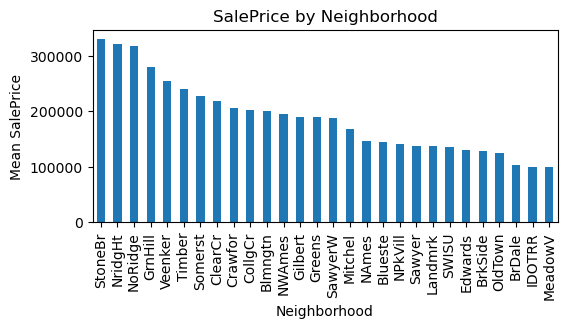

In [20]:
%store -r df
by_neighborhood = df.groupby(['Neighborhood'])['SalePrice'].mean()
by_neighborhood.sort_values(ascending=False,inplace=True)
by_neighborhood.plot(kind='bar', title='SalePrice by Neighborhood', ylabel='Mean SalePrice',
         xlabel='Neighborhood', figsize=(6, 2.5))

In [21]:
plt.savefig('../pictures/SalePrice by Neighnorhood.PNG')

<Figure size 640x480 with 0 Axes>

The chart shows that StoneBr, NridgHt and NoRidge are the most valuable neigbhorhoods in terms of housing price, given all the other factors being equal.